In [2]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [9]:
# ls /projects/stockprediction/01_data/
# Import data
data = pd.read_csv('/projects/core-stockprediction/01_data/data_stocks.csv')

type(data)
data.loc[0:10, 'SP500']
data.head()

# Drop date variable
data = data.drop(['DATE'], 1)

# # Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# # print("rows %d" % n)
# # print("cols %d" % p)

# # Make data a np.array
data = data.values

# data[0:1]
%who


pandas.core.frame.DataFrame

0     2363.6101
1     2364.1001
2     2362.6799
3     2364.3101
4     2364.8501
5     2365.6201
6     2365.2000
7     2365.2900
8     2364.3201
9     2364.6399
10    2364.5801
Name: SP500, dtype: float64

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


InteractiveShell	 MinMaxScaler	 data	 n	 np	 p	 pd	 plt	 tf	 
train_start	 


In [14]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n


data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

# print(np.arange(train_start, train_end))
print(data[0, :10])

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# print("scaled")
# print(data_train[0])

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

print("X")
print(X_train.shape)
print("Y")
print(y_train.shape)

# Number of stocks in training data
n_stocks = X_train.shape[1]
print("number of stocks in training")
print(n_stocks)

[ 2363.6101    42.33     143.68     129.63      82.04     102.23      85.22
    59.76     121.52      38.99  ]


MinMaxScaler(copy=True, feature_range=(-1, 1))

X
(33012, 500)
Y
(33012,)
number of stocks in training
500


weight initializer
Tensor("random_uniform_4:0", shape=(500, 1024), dtype=float32)
('MSE Train: ', 1.1916611)
('MSE Test: ', 1.9620292)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 2.18246675  2.18731952  2.18907356 ...,  2.0399766   2.02093697
  2.03308249]


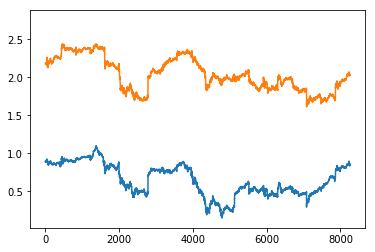

Text(0.5,1,u'Epoch 0, Batch 0')

('MSE Train: ', 0.0005645433)
('MSE Test: ', 0.029192934)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.8822493   0.88193178  0.88211447 ...,  1.07840347  1.06729996
  1.07723081]


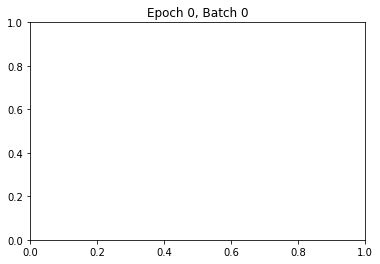

Text(0.5,1,u'Epoch 0, Batch 50')

('MSE Train: ', 0.00053303933)
('MSE Test: ', 0.030436503)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91118962  0.91037482  0.9099046  ...,  1.09756732  1.08565116
  1.09604406]


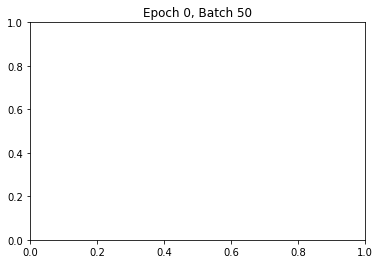

Text(0.5,1,u'Epoch 0, Batch 100')

('MSE Train: ', 0.00015762875)
('MSE Test: ', 0.023480728)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89063138  0.88994259  0.88978565 ...,  1.07277572  1.06045175
  1.07189727]


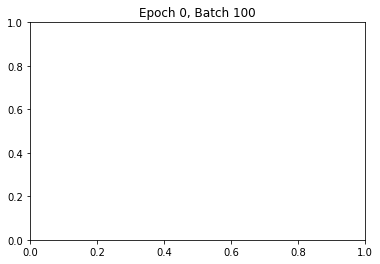

Text(0.5,1,u'Epoch 1, Batch 0')

('MSE Train: ', 0.00020287831)
('MSE Test: ', 0.026019184)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.9114846   0.91038561  0.9098835  ...,  1.10059929  1.08745623
  1.09973419]


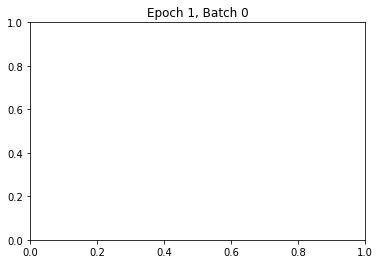

Text(0.5,1,u'Epoch 1, Batch 50')

('MSE Train: ', 0.00055749825)
('MSE Test: ', 0.023660796)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.86766344  0.86708522  0.86668813 ...,  1.01573682  1.00651932
  1.01574302]


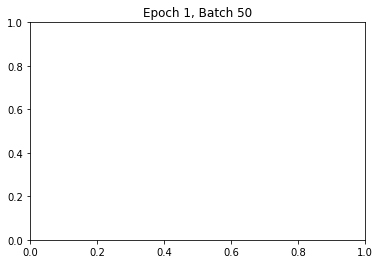

Text(0.5,1,u'Epoch 1, Batch 100')

('MSE Train: ', 0.00017143501)
('MSE Test: ', 0.01772899)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.86805296  0.86732107  0.86687362 ...,  0.99532306  0.98639464
  0.99570864]


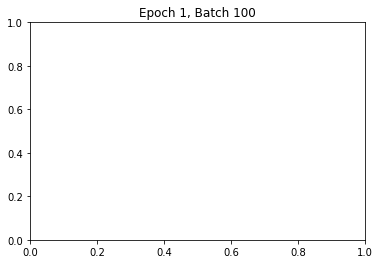

Text(0.5,1,u'Epoch 2, Batch 0')

In [ ]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

print("weight initializer")
print(weight_initializer([n_stocks, n_neurons_1]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
# plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 2.5)
# print(line2)
# plt.show()

# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            
            %store pred
            
            print(type(pred))
            print(pred[0])
            line2.set_ydata(pred[0])
            plt.show()
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#             plt.pause(0.01)

